# Overview of Content:

### mlo_08_spectra_analysis:

__Sections__:
- Main Module Import Section and Notebook Settings
- Initialize Custom Functions
- Read Notebook Variables
- Filtered FFT Results
- Create Result Tables of Filtered FFT Peaks in certain Time Periods


__Save Dataframes as Notebook Variables and as Text Files__:
- Create Result Tables of Filtered FFT Peaks in certain Time Periods:
    - fft_peaks_0_2_yr
    - fft_peaks_2_3_yr
    - fft_peaks_3_4_yr
    - fft_peaks_4_6_yr
    - fft_peaks_6_10_yr
    
    
- Merge Table Results of FFT Peaks
    - fft_peaks_merged
    - fft_peaks_merged_all
    - fft_peaks_years
    - fft_peaks_years_short

    
__Plot and Save Figures__:
- Filtered FFT Results:
    - fft_mmlo_filtered_compare
    - fft_mmlo_filtered_compare_norm
    - fft_mmlo_oeni_filtered
    - fft_mmlo_oeni_filtered_detail

## Main Module Import Section and Notebook Settings

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import time
from scipy.fftpack import fft
from scipy import signal
import math
import matplotlib.pyplot as plt
%matplotlib notebook

plt.style.use('ggplot')
from matplotlib import rcParams
rcParams['lines.linewidth'] = 0.9
rcParams['figure.figsize'] = 9, 4.5
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%config InlineBackend.figure_format = 'retina'

import matplotlib

myred = '#E24A33'
myblue = '#348ABD'


## Initialize Custom Functions

In [2]:
def yr_sec(a=1):
    """
    convert years into seconds
    """
    return a * 60 * 60 * 24 * 365

In [3]:
def m_sec(m=1):
    """
    convert months into seconds
    """
    m_per_yr = 12 / m
    return yr_sec() / m_per_yr

In [4]:
def get_fs(t):
    """
    returns sampling rate in Hz from time period in s
    """
    return 1 / t

In [5]:
def get_res(bins, fs=get_fs(m_sec())):
    """
    calculate the resolution / time per bin in s
    """
    return 0.5 * fs / bins

In [6]:
def bin_frq(bin_peak, bins_tot):
    return (bin_peak * get_res(bins_tot))

In [7]:
def bin_yr(bin_peak, bins_tot):
    """
    calculates the corresponding year of a bin
    """
    if bin_peak <=0:
        bin_peak = 0.5
        
    return (bin_peak * get_res(bins_tot) * yr_sec())**-1

In [8]:
def yr_bin(yr, ax_yr):
    """
    converts a year (period of frequency into the corresponding bin.
    axis array with years is needed.
    """
    bin_ax = np.where(ax_yr >= yr)
    closest_bin = np.max(bin_ax)
    return closest_bin

## Read Notebook Variables

In [9]:
# read internal jupyter notebook variables

# stored via notebook: mlo_01_import.ipynb:
%store -r mmlo
%store -r oeni

# stored via notebook: mlo_05_fft.ipynb:
%store -r fft_mmlo
%store -r fft_mmlo_nopad_nowin
%store -r fft_mmlo_cut_a
%store -r fft_oeni
%store -r fft_oeni_cut_a
%store -r fft_oeni_nopad_nowin

# stored via notebook: mlo_06-1_filter_mmlo.ipynb:
%store -r filtered_mmlo

# stored via notebook: mlo_06-2_filter_oeni.ipynb:
%store -r filtered_oeni

# stored via notebook: mlo_07_filtered_correlations_fft.ipynb:
%store -r fft_filtered_mmlo
%store -r fft_filtered_oeni
%store -r fft_filtered_mmlo_cut_a
%store -r fft_filtered_oeni_cut_a

## Filtered FFT Results

#####  Magnitude of Unfiltered vs. Filtered FFT: Mauna Loa

<IPython.core.display.Javascript object>


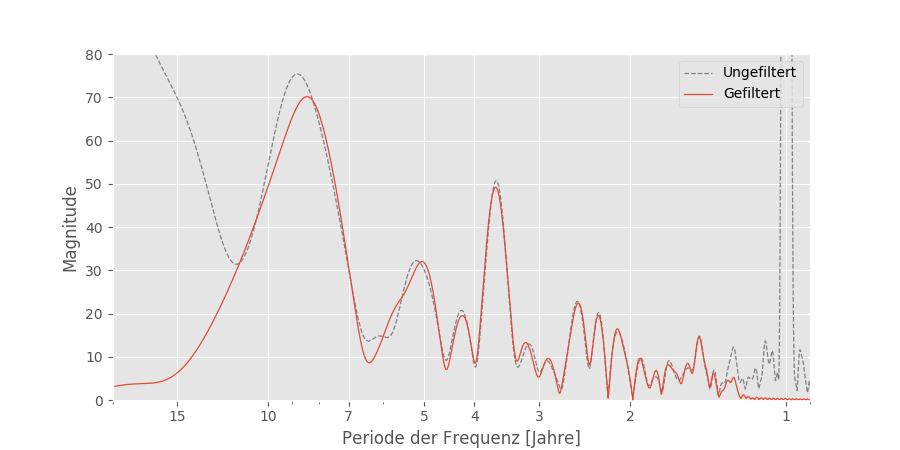

(20, 0.9)

(-0.05, 80)

In [10]:
rcParams['figure.figsize'] = 9, 4.5

x_start = 20
x_stop = 0.9
x_years = [1, 2, 3, 4, 5, 7, 10, 15]

fig,ax = plt.subplots()
ax.plot(fft_mmlo.period_yr.values, fft_mmlo.mag.values, '--', color='grey', label='Ungefiltert')
ax.plot(fft_filtered_mmlo.period_yr.values, fft_filtered_mmlo.mag.values, color=myred, label='Gefiltert')

ax.set_ylabel('Magnitude')
ax.set_xlabel('Periode der Frequenz [Jahre]')
ax.set_xlim(x_start, x_stop)
ax.set_ylim(-0.05, 80)
ax.set_xscale('log')
ax.set_xticks(x_years)
# ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend(loc='upper right')
plt.savefig('plots/fft_mmlo_filtered_compare.pdf')

#####  Normalized Magnitude of Unfiltered vs. Filtered FFT: Mauna Loa

<IPython.core.display.Javascript object>


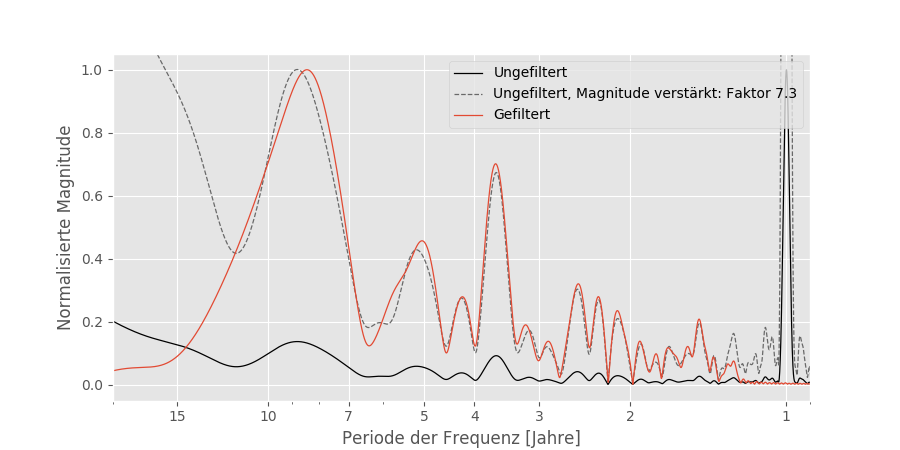

(20, 0.9)

(-0.05, 1.05)

In [11]:
rcParams['figure.figsize'] = 9, 4.5

x_start = 20
x_stop = 0.9
x_years = [1, 2, 3, 4, 5, 7, 10, 15]
mag_fac = 7.3
label_mag_fac = 'Ungefiltert, Magnitude verstärkt: Faktor ' + str(mag_fac)

fig,ax = plt.subplots()
ax.plot(fft_mmlo.period_yr.values, fft_mmlo.mag_norm.values, color='k', label='Ungefiltert')
ax.plot(fft_mmlo.period_yr.values, fft_mmlo.mag_norm.values * mag_fac, '--', color='dimgrey', label=label_mag_fac)
ax.plot(fft_filtered_mmlo.period_yr.values, fft_filtered_mmlo.mag_norm.values, color=myred, label='Gefiltert')

ax.set_ylabel('Normalisierte Magnitude')
ax.set_xlabel('Periode der Frequenz [Jahre]')
ax.set_xlim(x_start, x_stop)
ax.set_ylim(-0.05, 1.05)
ax.set_xscale('log')
ax.set_xticks(x_years)
# ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend()
plt.savefig('plots/fft_mmlo_filtered_compare_norm.pdf')

#####  Normalized Magnitude of Filtered FFT: Mauna Loa and ONI (Time Periods: 1 - 15 Years)

<IPython.core.display.Javascript object>


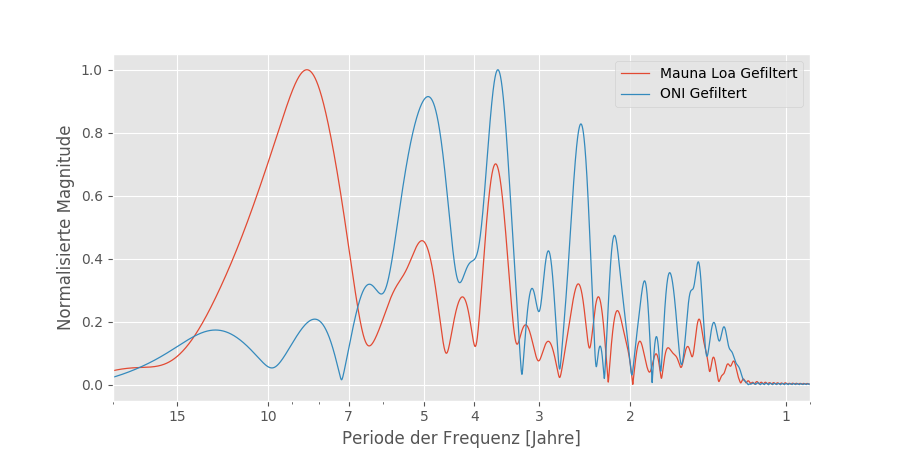

(20, 0.9)

In [12]:
x_start = 20
x_stop = 0.9
x_years = [1, 2, 3, 4, 5, 7, 10, 15]

fig,ax = plt.subplots()
ax.plot(fft_filtered_mmlo_cut_a.period_yr.values, fft_filtered_mmlo_cut_a.mag_norm.values, color=myred, label='Mauna Loa Gefiltert')
ax.plot(fft_filtered_oeni_cut_a.period_yr.values, fft_filtered_oeni_cut_a.mag_norm.values, color=myblue, label='ONI Gefiltert')

ax.set_ylabel('Normalisierte Magnitude')
ax.set_xlabel('Periode der Frequenz [Jahre]')
ax.set_xlim(x_start, x_stop)
# ax.set_ylim(-0.05, 1.05)
ax.set_xscale('log')
ax.set_xticks(x_years)
# ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.legend()
plt.savefig('plots/fft_mmlo_oeni_filtered.pdf')

#####  Normalized Magnitude of Filtered FFT: Mauna Loa and ONI (Time Periods: 2 - 6 Years)

<IPython.core.display.Javascript object>


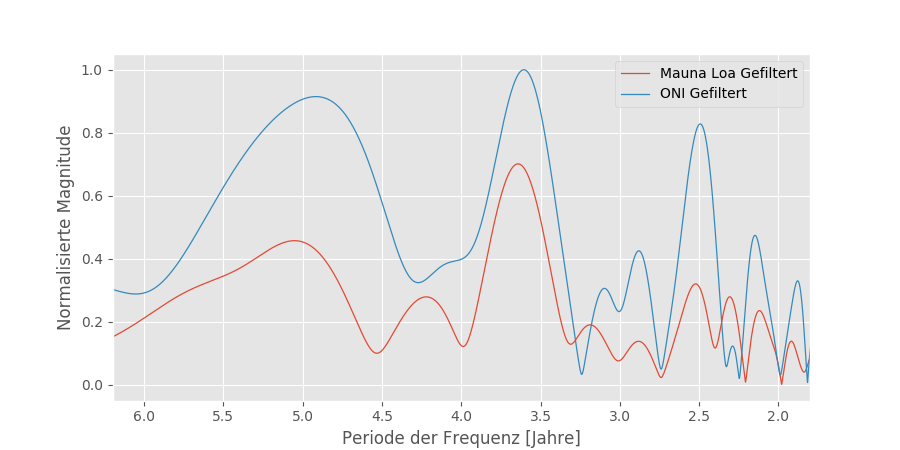

(6.2, 1.8)

In [13]:
x_start = 6.2
x_stop = 1.8
x_years = [6, 5.5, 5, 4.5, 4, 3.5, 3, 2.5, 2]

fig,ax = plt.subplots()
ax.plot(fft_filtered_mmlo_cut_a.period_yr.values, fft_filtered_mmlo_cut_a.mag_norm.values, color=myred, label='Mauna Loa Gefiltert')
ax.plot(fft_filtered_oeni_cut_a.period_yr.values, fft_filtered_oeni_cut_a.mag_norm.values, color=myblue, label='ONI Gefiltert')

ax.set_ylabel('Normalisierte Magnitude')
ax.set_xlabel('Periode der Frequenz [Jahre]')
ax.set_xlim(x_start, x_stop)
# ax.set_ylim(-0.05, 1.05)
# ax.set_xscale('log')
# ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_xticks(x_years)
plt.legend()
plt.savefig('plots/fft_mmlo_oeni_filtered_detail.pdf')

## Create Result Tables of Filtered FFT Peaks in certain Time Periods:

##### FFT Peaks: 0 - 2 Years [Time Period]

In [14]:
# create result table with local peaks of frequency domain data

# choose time span for local maximum / peak:
yr_min = 0.0  # minimum year limit for time span
yr_max = 2.0  # maximum year limit for time span

# appendix for label of data in table
label_app = '0-2_yr'

fft_peaks = pd.DataFrame()  # initialize dataframe

# -----------------------------------------------------
# fft_mmlo_nopad_nowin
# -----------------------------------------------------
label_name = 'mmlo_nopad_nowin_' + label_app  # table label
df = fft_mmlo_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo
# -----------------------------------------------------
label_name = 'mmlo_filtered_' + label_app  # table label
df = fft_mmlo.copy()  # copy fft data to temp dataframe no filtering for 1-year period!!
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo_cut_a
# -----------------------------------------------------
label_name = 'mmlo_filtered_cut_a_' + label_app  # table label
df = fft_mmlo_cut_a.copy()  # copy fft data to temp dataframe -> no filtering for 1-year period!!
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_oeni_nopad_nowin
# -----------------------------------------------------
label_name = 'oeni_nopad_nowin_' + label_app  # table label
df = fft_oeni_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni
# -----------------------------------------------------
label_name = 'oeni_filtered_' + label_app  # table label
df = fft_oeni.copy()  # copy fft data to temp dataframe -> no filtering for 1-year period!!
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy() 
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni_cut_a
# -----------------------------------------------------
label_name = 'oeni_filtered_cut_a_' + label_app  # table label
df = fft_oeni_cut_a.copy()  # copy fft data to temp dataframe -> no filtering for 1-year period!!
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak
# -----------------------------------------------------

# ----------------------------------------------------------------------------------
# copy and save result table:
fft_peaks_0_2_yr = fft_peaks.transpose().copy()
fft_peaks_0_2_yr

%store fft_peaks_0_2_yr
%store fft_peaks_0_2_yr >data_results/fft_peaks_0_2_yr.txt

,freq,bin,bins_total,period_yr,mag,mag_norm,amp,amp_norm,pha,pha_norm
mmlo_nopad_nowin_0-2_yr,3.155447e-08,59.0,356.0,1.005650,809.299491,1.000000,2.273313,1.000000,0.451450,0.143701
mmlo_filtered_0-2_yr,3.175058e-08,17810.0,106800.0,0.999439,549.977305,1.000000,0.005150,1.000000,-0.736158,-0.234328
mmlo_filtered_cut_a_0-2_yr,3.175002e-08,17785.0,106650.0,0.999438,549.142827,1.000000,0.005149,1.000000,-0.735857,-0.234233
oeni_nopad_nowin_0-2_yr,2.070833e-08,44.0,405.0,1.534091,60.973578,0.441319,0.150552,0.441319,-1.151750,-0.368166
oeni_filtered_0-2_yr,2.146920e-08,13685.0,121350.0,1.477896,37.336169,0.364126,0.000308,0.364126,-2.869452,-0.913391
oeni_filtered_cut_a_0-2_yr,2.145469e-08,12018.0,106650.0,1.479031,36.307084,0.392117,0.000340,0.392117,0.576240,0.183424


Stored 'fft_peaks_0_2_yr' (DataFrame)
Writing 'fft_peaks_0_2_yr' (DataFrame) to file 'data_results/fft_peaks_0_2_yr.txt'.


##### FFT Peaks: 2 - 3 Years [Time Period]

In [15]:
# create result table with local peaks of frequency domain data

# choose time span for local maximum / peak:
yr_min = 2.0  # minimum year limit for time span
yr_max = 3.0  # maximum year limit for time span

# appendix for label of data in table
label_app = '2-3_yr'

fft_peaks = pd.DataFrame()  # initialize dataframe

# -----------------------------------------------------
# fft_mmlo_nopad_nowin
# -----------------------------------------------------
label_name = 'mmlo_nopad_nowin_' + label_app  # table label
df = fft_mmlo_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo
# -----------------------------------------------------
label_name = 'mmlo_filtered_' + label_app  # table label
df = fft_filtered_mmlo.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo_cut_a
# -----------------------------------------------------
label_name = 'mmlo_filtered_cut_a_' + label_app  # table label
df = fft_filtered_mmlo_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_oeni_nopad_nowin
# -----------------------------------------------------
label_name = 'oeni_nopad_nowin_' + label_app  # table label
df = fft_oeni_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni
# -----------------------------------------------------
label_name = 'oeni_filtered_' + label_app  # table label
df = fft_filtered_oeni.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni_cut_a
# -----------------------------------------------------
label_name = 'oeni_filtered_cut_a_' + label_app  # table label
df = fft_filtered_oeni_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak
# -----------------------------------------------------

# ----------------------------------------------------------------------------------
# copy and save result table:
fft_peaks_2_3_yr = fft_peaks.transpose().copy()
fft_peaks_2_3_yr

%store fft_peaks_2_3_yr
%store fft_peaks_2_3_yr >data_results/fft_peaks_2_3_yr.txt

,freq,bin,bins_total,period_yr,mag,mag_norm,amp,amp_norm,pha,pha_norm
mmlo_nopad_nowin_2-3_yr,1.390536e-08,26.0,356.0,2.282051,40.413151,0.049936,0.113520,0.049936,1.286712,0.409573
mmlo_filtered_2-3_yr,1.258613e-08,7060.0,106800.0,2.521246,22.479313,0.320462,0.000210,0.320462,-0.288646,-0.091879
mmlo_filtered_cut_a_2-3_yr,1.258397e-08,7049.0,106650.0,2.521634,22.441115,0.320239,0.000210,0.320239,-0.276212,-0.087921
oeni_nopad_nowin_2-3_yr,1.082481e-08,23.0,405.0,2.934783,96.889934,0.701277,0.239234,0.701277,-2.881215,-0.921003
oeni_filtered_2-3_yr,1.280308e-08,8161.0,121350.0,2.478250,78.113928,0.759482,0.000644,0.759482,-1.034041,-0.329151
oeni_filtered_cut_a_2-3_yr,1.273214e-08,7132.0,106650.0,2.492288,76.439222,0.828027,0.000717,0.828027,1.272281,0.404980


Stored 'fft_peaks_2_3_yr' (DataFrame)
Writing 'fft_peaks_2_3_yr' (DataFrame) to file 'data_results/fft_peaks_2_3_yr.txt'.


##### FFT Peaks: 3 - 4 Years [Time Period]

In [16]:
# create result table with local peaks of frequency domain data

# choose time span for local maximum / peak:
yr_min = 3.0  # minimum year limit for time span
yr_max = 4.0  # maximum year limit for time span
label_app = '3-4_yr'  # appendix for label of data in table

# initialize dataframe
fft_peaks = pd.DataFrame()

# -----------------------------------------------------
# fft_mmlo_nopad_nowin
# -----------------------------------------------------
label_name = 'mmlo_nopad_nowin_' + label_app  # table label
df = fft_mmlo_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo
# -----------------------------------------------------
label_name = 'mmlo_filtered_' + label_app  # table label
df = fft_filtered_mmlo.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo_cut_a
# -----------------------------------------------------
label_name = 'mmlo_filtered_cut_a_' + label_app  # table label
df = fft_filtered_mmlo_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_oeni_nopad_nowin
# -----------------------------------------------------
label_name = 'oeni_nopad_nowin_' + label_app  # table label
df = fft_oeni_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni
# -----------------------------------------------------
label_name = 'oeni_filtered_' + label_app  # table label
df = fft_filtered_oeni.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni_cut_a
# -----------------------------------------------------
label_name = 'oeni_filtered_cut_a_' + label_app  # table label
df = fft_filtered_oeni_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak
# -----------------------------------------------------

# ----------------------------------------------------------------------------------
# copy and save result table:
fft_peaks_3_4_yr = fft_peaks.transpose().copy()
fft_peaks_3_4_yr

%store fft_peaks_3_4_yr
%store fft_peaks_3_4_yr >data_results/fft_peaks_3_4_yr.txt

,freq,bin,bins_total,period_yr,mag,mag_norm,amp,amp_norm,pha,pha_norm
mmlo_nopad_nowin_3-4_yr,8.557145e-09,16.0,356.0,3.708333,73.290831,0.090561,0.205873,0.090561,-0.647366,-0.206063
mmlo_filtered_3-4_yr,8.714026e-09,4888.0,106800.0,3.641571,49.205628,0.701469,0.000461,0.701469,-1.845475,-0.587433
mmlo_filtered_cut_a_3-4_yr,8.713627e-09,4881.0,106650.0,3.641672,49.137755,0.701206,0.000461,0.701206,-1.844030,-0.586973
oeni_nopad_nowin_3-4_yr,8.942234e-09,19.0,405.0,3.552632,132.387544,0.958205,0.326883,0.958205,-3.091276,-0.988151
oeni_filtered_3-4_yr,8.807316e-09,5614.0,121350.0,3.602601,102.851527,1.000000,0.000848,1.000000,-2.060808,-0.655988
oeni_filtered_cut_a_3-4_yr,8.801102e-09,4930.0,106650.0,3.605477,92.314852,1.000000,0.000866,1.000000,-0.338645,-0.107794


Stored 'fft_peaks_3_4_yr' (DataFrame)
Writing 'fft_peaks_3_4_yr' (DataFrame) to file 'data_results/fft_peaks_3_4_yr.txt'.


##### FFT Peaks: 4 -6 Years [Time Period]

In [17]:
# create result table with local peaks of frequency domain data

# choose time span for local maximum / peak:
yr_min = 4.0  # minimum year limit for time span
yr_max = 6.0  # maximum year limit for time span
label_app = '4-6_yr'  # appendix for label of data in table

# initialize dataframe
fft_peaks = pd.DataFrame()

# -----------------------------------------------------
# fft_mmlo_nopad_nowin
# -----------------------------------------------------
label_name = 'mmlo_nopad_nowin_' + label_app  # table label
df = fft_mmlo_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo
# -----------------------------------------------------
label_name = 'mmlo_filtered_' + label_app  # table label
df = fft_filtered_mmlo.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo_cut_a
# -----------------------------------------------------
label_name = 'mmlo_filtered_cut_a_' + label_app  # table label
df = fft_filtered_mmlo_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_oeni_nopad_nowin
# -----------------------------------------------------
label_name = 'oeni_nopad_nowin_' + label_app  # table label
df = fft_oeni_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni
# -----------------------------------------------------
label_name = 'oeni_filtered_' + label_app  # table label
df = fft_filtered_oeni.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni_cut_a
# -----------------------------------------------------
label_name = 'oeni_filtered_cut_a_' + label_app  # table label
df = fft_filtered_oeni_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak
# -----------------------------------------------------

# ----------------------------------------------------------------------------------
# copy and save result table:
fft_peaks_4_6_yr = fft_peaks.transpose().copy()
fft_peaks_4_6_yr

%store fft_peaks_4_6_yr
%store fft_peaks_4_6_yr >data_results/fft_peaks_4_6_yr.txt

,freq,bin,bins_total,period_yr,mag,mag_norm,amp,amp_norm,pha,pha_norm
mmlo_nopad_nowin_4-6_yr,5.883038e-09,11.0,356.0,5.393939,55.453468,0.068520,0.155768,0.068520,0.657095,0.209160
mmlo_filtered_4-6_yr,6.282371e-09,3524.0,106800.0,5.051078,32.056362,0.456992,0.000300,0.456992,-1.281097,-0.407786
mmlo_filtered_cut_a_4-6_yr,6.280381e-09,3518.0,106650.0,5.052587,32.049469,0.457352,0.000301,0.457352,-1.270725,-0.404484
oeni_nopad_nowin_4-6_yr,6.589014e-09,14.0,405.0,4.821429,138.162086,1.000000,0.341141,1.000000,1.724193,0.551152
oeni_filtered_4-6_yr,6.487041e-09,4135.0,121350.0,4.891173,90.812016,0.882943,0.000748,0.882943,2.120646,0.675035
oeni_filtered_cut_a_4-6_yr,6.453546e-09,3615.0,106650.0,4.917012,84.451877,0.914824,0.000792,0.914824,0.240253,0.076475


Stored 'fft_peaks_4_6_yr' (DataFrame)
Writing 'fft_peaks_4_6_yr' (DataFrame) to file 'data_results/fft_peaks_4_6_yr.txt'.


##### FFT Peaks: 6 - 10 Years [Time Period]

In [18]:
# create result table with local peaks of frequency domain data

# choose time span for local maximum / peak:
yr_min = 6.0  # minimum year limit for time span
yr_max = 10.0  # maximum year limit for time span
label_app = '6-10_yr'  # appendix for label of data in table

# initialize dataframe
fft_peaks = pd.DataFrame()

# -----------------------------------------------------
# fft_mmlo_nopad_nowin
# -----------------------------------------------------
label_name = 'mmlo_nopad_nowin_' + label_app  # table label
df = fft_mmlo_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo
# -----------------------------------------------------
label_name = 'mmlo_filtered_' + label_app  # table label
df = fft_filtered_mmlo.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_mmlo_cut_a
# -----------------------------------------------------
label_name = 'mmlo_filtered_cut_a_' + label_app  # table label
df = fft_filtered_mmlo_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_oeni_nopad_nowin
# -----------------------------------------------------
label_name = 'oeni_nopad_nowin_' + label_app  # table label
df = fft_oeni_nopad_nowin.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni
# -----------------------------------------------------
label_name = 'oeni_filtered_' + label_app  # table label
df = fft_filtered_oeni.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak

# -----------------------------------------------------
# fft_filtered_oeni_cut_a
# -----------------------------------------------------
label_name = 'oeni_filtered_cut_a_' + label_app  # table label
df = fft_filtered_oeni_cut_a.copy()  # copy fft data to temp dataframe
# trim dataframe to time span by chosen years
df_cut = df[(df['period_yr'] <= yr_max) & (df['period_yr'] >= yr_min)].copy()  
fft_peaks[label_name] = df_cut.loc[df_cut.mag_norm.idxmax()].copy()  # insert related data of local peak
# -----------------------------------------------------

# ----------------------------------------------------------------------------------
# copy and save result table:
fft_peaks_6_10_yr = fft_peaks.transpose().copy()
fft_peaks_6_10_yr

%store fft_peaks_6_10_yr
%store fft_peaks_6_10_yr >data_results/fft_peaks_6_10_yr.txt

,freq,bin,bins_total,period_yr,mag,mag_norm,amp,amp_norm,pha,pha_norm
mmlo_nopad_nowin_6-10_yr,3.743751e-09,7.0,356.0,8.476190,88.961904,0.109925,0.249893,0.109925,1.567174,0.498847
mmlo_filtered_6-10_yr,3.766927e-09,2113.0,106800.0,8.424042,70.146516,1.000000,0.000657,1.000000,1.623017,0.516622
mmlo_filtered_cut_a_6-10_yr,3.765015e-09,2109.0,106650.0,8.428165,70.076111,1.000000,0.000657,1.000000,1.634012,0.520122
oeni_nopad_nowin_6-10_yr,5.177083e-09,11.0,405.0,6.136364,65.411819,0.473443,0.161511,0.473443,2.435737,0.778602
oeni_filtered_6-10_yr,4.882146e-09,3112.0,121350.0,6.499036,36.586583,0.355722,0.000301,0.355722,-2.186986,-0.696152
oeni_filtered_cut_a_6-10_yr,4.971819e-09,2785.0,106650.0,6.382406,29.463329,0.319161,0.000276,0.319161,-1.287801,-0.409920


Stored 'fft_peaks_6_10_yr' (DataFrame)
Writing 'fft_peaks_6_10_yr' (DataFrame) to file 'data_results/fft_peaks_6_10_yr.txt'.


## Merge Table Results of FFT Peaks

##### Basic Table Results of FFT Peaks for Mauna Loa and ONI:

In [19]:
fft_peaks_merged = fft_peaks_0_2_yr.append([fft_peaks_2_3_yr, fft_peaks_3_4_yr, fft_peaks_4_6_yr, fft_peaks_6_10_yr])
fft_peaks_merged = fft_peaks_merged.drop([\
                                          'mmlo_nopad_nowin_0-2_yr', 'mmlo_filtered_cut_a_0-2_yr',\
                                          'oeni_nopad_nowin_0-2_yr', 'oeni_filtered_cut_a_0-2_yr',\
                                          'mmlo_nopad_nowin_2-3_yr', 'mmlo_filtered_cut_a_2-3_yr',\
                                          'oeni_nopad_nowin_2-3_yr', 'oeni_filtered_cut_a_2-3_yr',\
                                          'mmlo_nopad_nowin_3-4_yr', 'mmlo_filtered_cut_a_3-4_yr',\
                                          'oeni_nopad_nowin_3-4_yr', 'oeni_filtered_cut_a_3-4_yr',\
                                          'mmlo_nopad_nowin_4-6_yr', 'mmlo_filtered_cut_a_4-6_yr',\
                                          'oeni_nopad_nowin_4-6_yr', 'oeni_filtered_cut_a_4-6_yr',\
                                          'mmlo_nopad_nowin_6-10_yr', 'mmlo_filtered_cut_a_6-10_yr',\
                                          'oeni_nopad_nowin_6-10_yr', 'oeni_filtered_cut_a_6-10_yr',\
                                         ]).copy()
fft_peaks_merged

%store fft_peaks_merged
%store fft_peaks_merged >data_results/fft_peaks_merged.txt

,freq,bin,bins_total,period_yr,mag,mag_norm,amp,amp_norm,pha,pha_norm
mmlo_filtered_0-2_yr,3.175058e-08,17810.0,106800.0,0.999439,549.977305,1.000000,0.005150,1.000000,-0.736158,-0.234328
oeni_filtered_0-2_yr,2.146920e-08,13685.0,121350.0,1.477896,37.336169,0.364126,0.000308,0.364126,-2.869452,-0.913391
mmlo_filtered_2-3_yr,1.258613e-08,7060.0,106800.0,2.521246,22.479313,0.320462,0.000210,0.320462,-0.288646,-0.091879
oeni_filtered_2-3_yr,1.280308e-08,8161.0,121350.0,2.478250,78.113928,0.759482,0.000644,0.759482,-1.034041,-0.329151
mmlo_filtered_3-4_yr,8.714026e-09,4888.0,106800.0,3.641571,49.205628,0.701469,0.000461,0.701469,-1.845475,-0.587433
oeni_filtered_3-4_yr,8.807316e-09,5614.0,121350.0,3.602601,102.851527,1.000000,0.000848,1.000000,-2.060808,-0.655988
mmlo_filtered_4-6_yr,6.282371e-09,3524.0,106800.0,5.051078,32.056362,0.456992,0.000300,0.456992,-1.281097,-0.407786
oeni_filtered_4-6_yr,6.487041e-09,4135.0,121350.0,4.891173,90.812016,0.882943,0.000748,0.882943,2.120646,0.675035
mmlo_filtered_6-10_yr,3.766927e-09,2113.0,106800.0,8.424042,70.146516,1.000000,0.000657,1.000000,1.623017,0.516622
oeni_filtered_6-10_yr,4.882146e-09,3112.0,121350.0,6.499036,36.586583,0.355722,0.000301,0.355722,-2.186986,-0.696152


Stored 'fft_peaks_merged' (DataFrame)
Writing 'fft_peaks_merged' (DataFrame) to file 'data_results/fft_peaks_merged.txt'.


##### Complete Table Results of FFT Peaks for Mauna Loa and ONI

In [20]:
fft_peaks_merged_all = fft_peaks_0_2_yr.append([fft_peaks_2_3_yr, \
                                            fft_peaks_3_4_yr, fft_peaks_4_6_yr, fft_peaks_6_10_yr])
fft_peaks_merged_all.head()
%store fft_peaks_merged_all
%store fft_peaks_merged_all >data_results/fft_peaks_merged_all.txt

,freq,bin,bins_total,period_yr,mag,mag_norm,amp,amp_norm,pha,pha_norm
mmlo_nopad_nowin_0-2_yr,3.155447e-08,59.0,356.0,1.005650,809.299491,1.000000,2.273313,1.000000,0.451450,0.143701
mmlo_filtered_0-2_yr,3.175058e-08,17810.0,106800.0,0.999439,549.977305,1.000000,0.005150,1.000000,-0.736158,-0.234328
mmlo_filtered_cut_a_0-2_yr,3.175002e-08,17785.0,106650.0,0.999438,549.142827,1.000000,0.005149,1.000000,-0.735857,-0.234233
oeni_nopad_nowin_0-2_yr,2.070833e-08,44.0,405.0,1.534091,60.973578,0.441319,0.150552,0.441319,-1.151750,-0.368166
oeni_filtered_0-2_yr,2.146920e-08,13685.0,121350.0,1.477896,37.336169,0.364126,0.000308,0.364126,-2.869452,-0.913391


Stored 'fft_peaks_merged_all' (DataFrame)
Writing 'fft_peaks_merged_all' (DataFrame) to file 'data_results/fft_peaks_merged_all.txt'.


### Table Results of FFT Peaks in Frequency Periods [Years] indexed by Range of Time-Periods

##### Complete Table Results of FFT Peaks in Frequency Periods [Years] for Mauna Loa and ONI

In [21]:
columns = ['0-2_years', '2-3_years', '3-4_years', '4-6_years', '6-10_years']
index = ['mmlo_nopad_nowin', 'mmlo_filtered', 'mmlo_filtered_cut_a', \
           'oeni_nopad_nowin', 'oeni_filtered', 'oeni_filtered_cut_a']
fft_peaks_years = pd.DataFrame(index=index, columns=columns)
fft_peaks_years['0-2_years'] = fft_peaks_0_2_yr.period_yr.values
fft_peaks_years['2-3_years'] = fft_peaks_2_3_yr.period_yr.values
fft_peaks_years['3-4_years'] = fft_peaks_3_4_yr.period_yr.values
fft_peaks_years['4-6_years'] = fft_peaks_4_6_yr.period_yr.values
fft_peaks_years['6-10_years'] = fft_peaks_6_10_yr.period_yr.values


fft_peaks_years = fft_peaks_years.transpose().copy()
fft_peaks_years

%store fft_peaks_years
%store fft_peaks_years >data_results/fft_peaks_years.txt

,mmlo_nopad_nowin,mmlo_filtered,mmlo_filtered_cut_a,oeni_nopad_nowin,oeni_filtered,oeni_filtered_cut_a
0-2_years,1.005650,0.999439,0.999438,1.534091,1.477896,1.479031
2-3_years,2.282051,2.521246,2.521634,2.934783,2.478250,2.492288
3-4_years,3.708333,3.641571,3.641672,3.552632,3.602601,3.605477
4-6_years,5.393939,5.051078,5.052587,4.821429,4.891173,4.917012
6-10_years,8.476190,8.424042,8.428165,6.136364,6.499036,6.382406


Stored 'fft_peaks_years' (DataFrame)
Writing 'fft_peaks_years' (DataFrame) to file 'data_results/fft_peaks_years.txt'.


##### Selected Table Results of FFT Peaks in Frequency Periods [Years] for Mauna Loa and ONI with Differences

In [22]:
fft_peaks_years_short = fft_peaks_years[['mmlo_nopad_nowin', 'mmlo_filtered_cut_a', 'oeni_nopad_nowin', 'oeni_filtered_cut_a']].drop(['6-10_years']).copy()

fft_peaks_years_short['diff_nopad_nowin'] = np.abs(fft_peaks_years_short.mmlo_nopad_nowin - fft_peaks_years_short.oeni_nopad_nowin)
fft_peaks_years_short['diff_filtered_cut_a'] = np.abs(fft_peaks_years_short.mmlo_filtered_cut_a - fft_peaks_years_short.oeni_filtered_cut_a)
fft_peaks_years_short['mean_filtered_cut_a'] = np.mean([fft_peaks_years_short.mmlo_filtered_cut_a, fft_peaks_years_short.oeni_filtered_cut_a], axis=0)

fft_peaks_years_short

%store fft_peaks_years_short
%store fft_peaks_years_short >data_results/fft_peaks_years_short.txt

,mmlo_nopad_nowin,mmlo_filtered_cut_a,oeni_nopad_nowin,oeni_filtered_cut_a,diff_nopad_nowin,diff_filtered_cut_a,mean_filtered_cut_a
0-2_years,1.005650,0.999438,1.534091,1.479031,0.528441,0.479594,1.239235
2-3_years,2.282051,2.521634,2.934783,2.492288,0.652731,0.029346,2.506961
3-4_years,3.708333,3.641672,3.552632,3.605477,0.155702,0.036195,3.623574
4-6_years,5.393939,5.052587,4.821429,4.917012,0.572511,0.135574,4.984800


Stored 'fft_peaks_years_short' (DataFrame)
Writing 'fft_peaks_years_short' (DataFrame) to file 'data_results/fft_peaks_years_short.txt'.


###### Above Table Results rounded

In [23]:
fft_peaks_years_short.round(2)

,mmlo_nopad_nowin,mmlo_filtered_cut_a,oeni_nopad_nowin,oeni_filtered_cut_a,diff_nopad_nowin,diff_filtered_cut_a,mean_filtered_cut_a
0-2_years,1.01,1.00,1.53,1.48,0.53,0.48,1.24
2-3_years,2.28,2.52,2.93,2.49,0.65,0.03,2.51
3-4_years,3.71,3.64,3.55,3.61,0.16,0.04,3.62
4-6_years,5.39,5.05,4.82,4.92,0.57,0.14,4.98
